# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pd.set_option("max_column", None)
%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

## Data Overview
### Read the dataset

In [2]:
data = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
df = data.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset, random sample check

In [4]:
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
df.tail(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

In [6]:
df.sample(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
3230,EZYV3231,Asia,Master's,Y,N,2426,1977,West,140821.26,Year,Y,Certified
6871,EZYV6872,Asia,Bachelor's,Y,Y,2670,1982,Northeast,105223.17,Year,Y,Certified
12875,EZYV12876,Asia,Master's,Y,N,4438,2013,South,129547.83,Year,N,Certified
17901,EZYV17902,Europe,High School,N,Y,3792,1978,West,106680.94,Year,Y,Denied
21021,EZYV21022,Asia,Bachelor's,Y,N,2956,1925,South,76517.67,Year,N,Certified


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [7]:
df.shape
print("The dataset has {} rows and {} columns of data".format(df.shape[0], df.shape[1]))

The dataset has 25480 rows and 12 columns of data


<IPython.core.display.Javascript object>

### Check the data types of the columns for the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

* There are lots of object data type in the data.

### Fixing the data types

In [9]:
cols = df.select_dtypes(["object"])
for i in cols.columns:
    df[i] = df[i].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


<IPython.core.display.Javascript object>

* we can see that the memory usage has decreased from 2.3 MB to 2.0 MB 

### Summary of the dataset.

In [10]:
df.describe(include=["category", "int64", "float64"]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* There are 6 continents in the database which Asia having the most frequency 
* The most frequent level of education is Bachelor’s.
* Around 58% of the data have job experience and nearly 12% need job training.
* There are some outliers in no_of_employees and prevailing wage columns
* The most frequent type of employment is full-time.
* Case status which is our target variable is mostly certified by nearly 66%.


**Dropping columns which are not adding any information.**

In [11]:
df.drop(["case_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
df.duplicated().value_counts()

False    25480
dtype: int64

<IPython.core.display.Javascript object>

* There is no duplicate value in the dataset.

**Let's look at the unqiue values of all the categories**

In [13]:
cols_cat = df.select_dtypes(["category"])
for i in cols_cat.columns:
    print("Unique values in", i, "are :")
    print(cols_cat[i].value_counts())
    print("*" * 50)

Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Univariate analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on no_of_employees

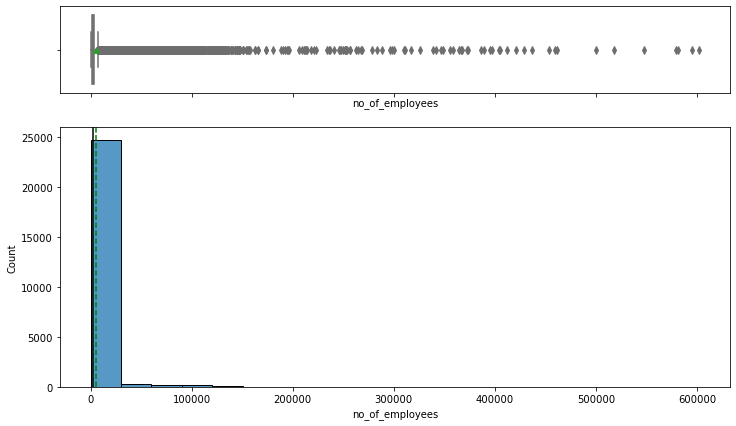

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "no_of_employees", bins=20)

* Most of the data are located in the first bin
* There are some outliers as discussed before and will be considered for further evaluation.
* The data is skewed to the right.
* More than half of the companies has less than 2200 employees (Median is 2109)

### Observations on yr_of_estab

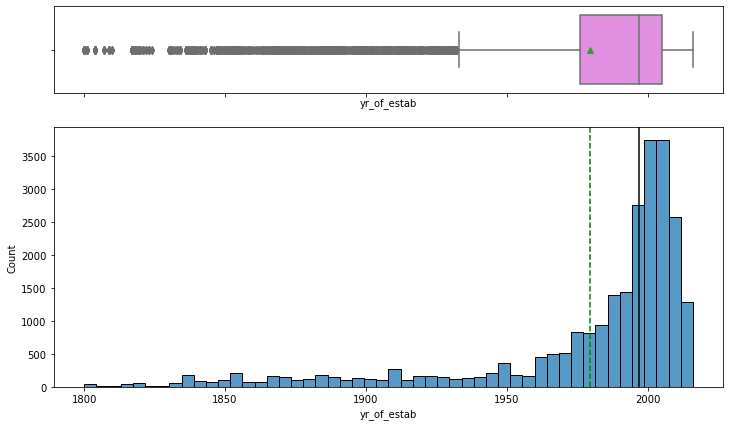

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "yr_of_estab", bins=50)

* The data is skewed to the left.
* More than half of the companies are established before 2000. (The median of data is 1997)

### Observations on prevailing_wage

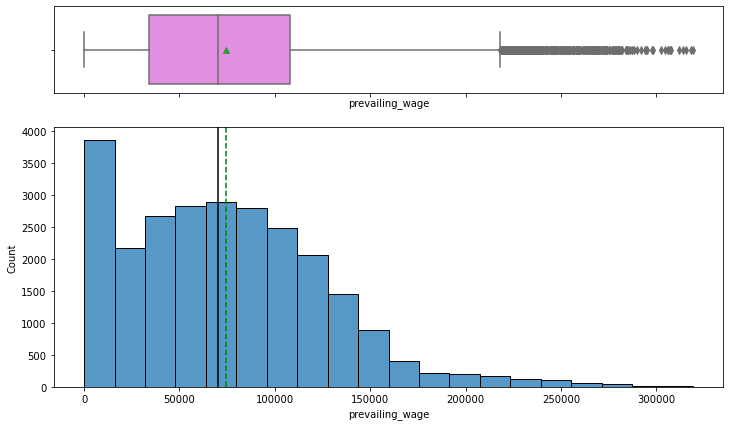

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "prevailing_wage", bins=20)

* The data cannot be analyzed by this graph as some data are in yearly rate, some are in hourly, some are in monthly, and some in weekly.
* Most of the data are yearly based.
* Different type of wages should be separated and then analyzed. But at this point, the data is skewed slightly to the right.

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on continent

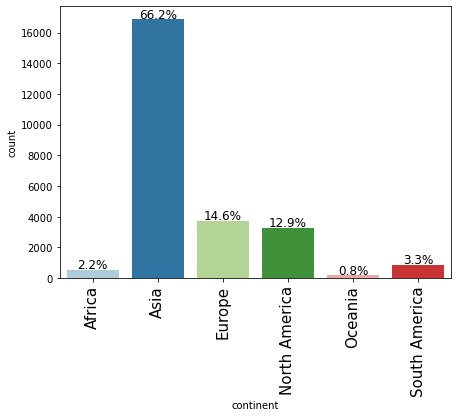

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(df, "continent")

* The most frequent data are for Asia with 66% and the less is for Oceania with 0.8%.
* It will be investigated how much percent Visa is certified in each continent.

### Observations on education of employees

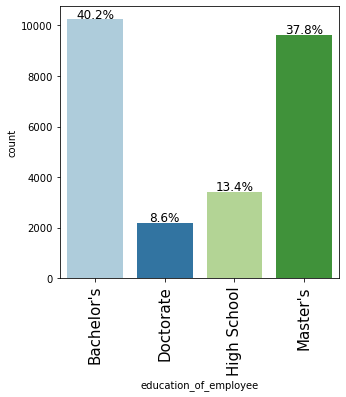

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(df, "education_of_employee")

* 40% of the applicant has Bachelor's degree and near 38% of them Master's degree.

### Observations on job experience

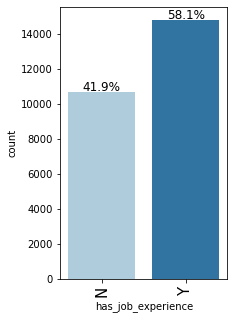

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(df, "has_job_experience")

* Near 60% of the applicant has job experince.

### Observations on job training requirment

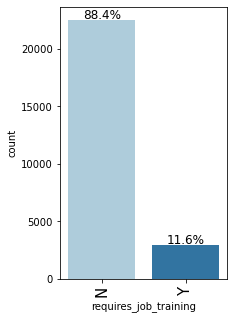

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "requires_job_training")

* Near 90% of the applicant no need for job training.

### Observations on region of employment

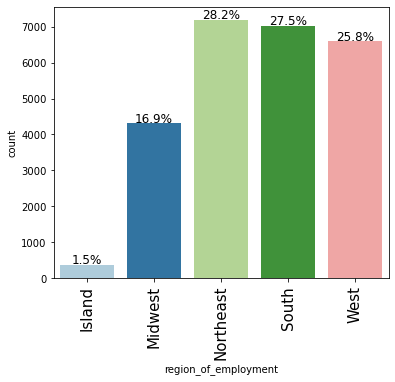

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "region_of_employment")

* About 1.5% of the people applied for the Island and the amount for the Midwest is near 17%. 
* Northeast, South, and West have more or less have the same percent.

### Observations on unit of the wages

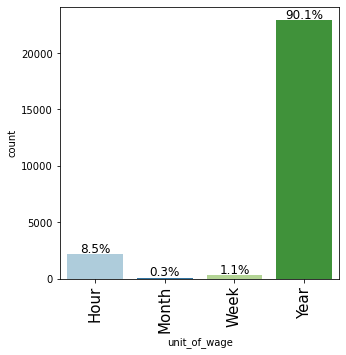

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "unit_of_wage")

* More than 90% unit of the wages are yearly, while 8.5 are also in the hourly rate.

### Observations on full time position

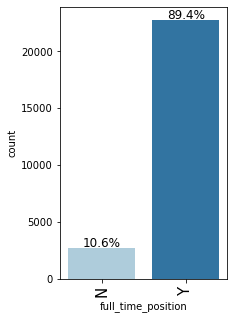

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "full_time_position")

* Near 90% of the applicats have full time position job.

### Observations on case status

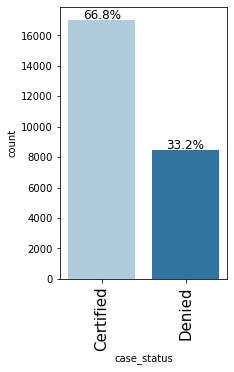

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(df, "case_status")

* Neat 67% of the applicants are certifed for work.

### Bivariate analysis

At this stage, it might be useful to convert our target variable, and some other variable with yes/no result to a numerical type

In [27]:
col_yn = ["has_job_experience", "requires_job_training", "full_time_position"]

<IPython.core.display.Javascript object>

In [28]:
df['case_status'] = df['case_status'].apply(lambda x :1 if x=='Certified' else 0).astype(int)

for cols in col_yn:
    df[cols] = df[cols].apply(lambda x :1 if x=='Y' else 0).astype(int)


<IPython.core.display.Javascript object>

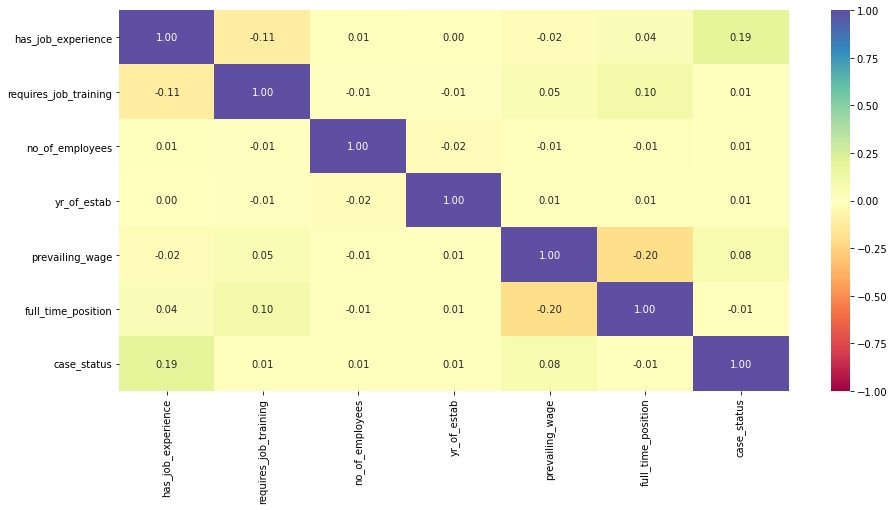

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* As it is clear the variables correlation to each other are low.
* The target variable has low corelation and no correlation with other variables.

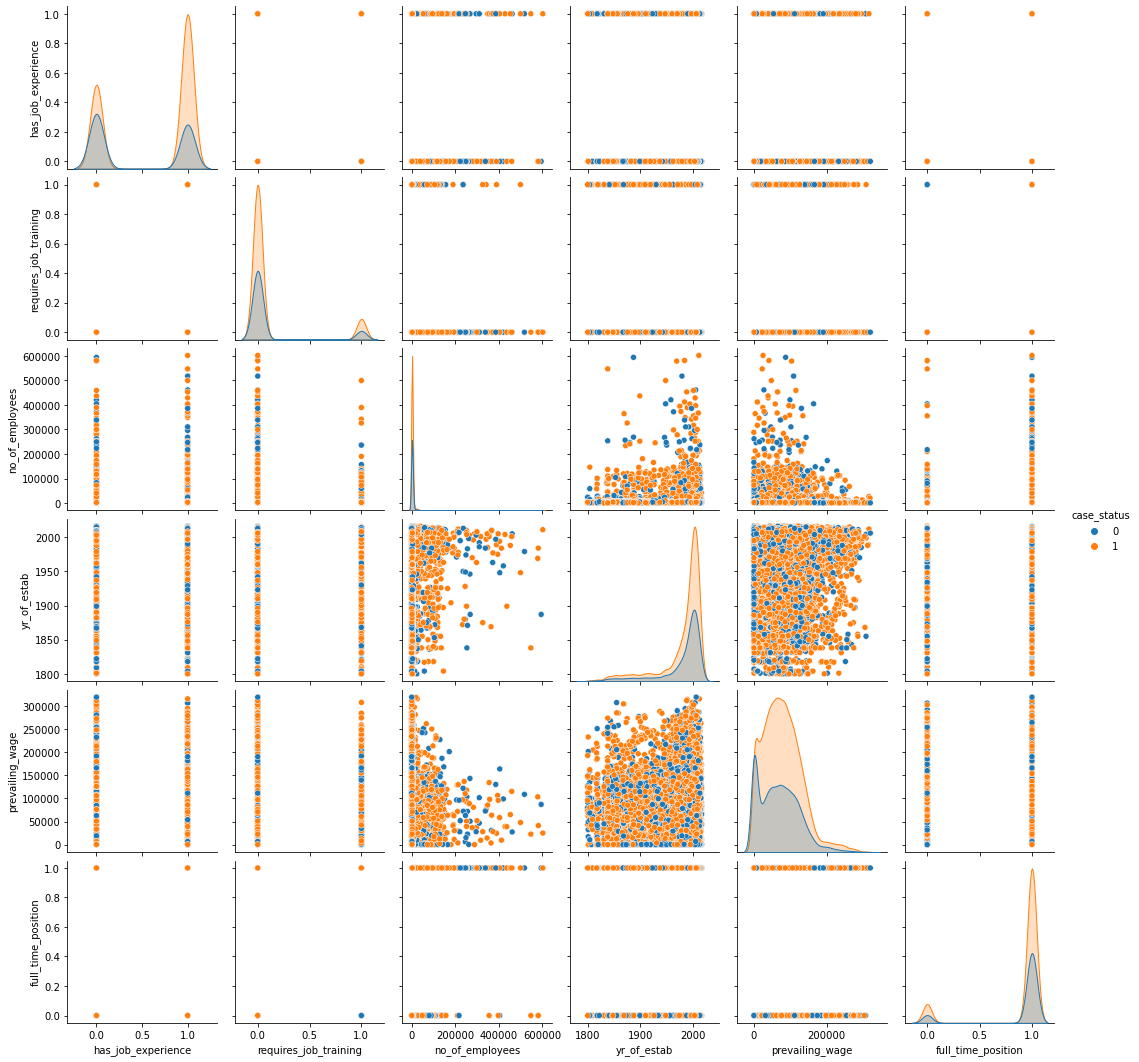

<IPython.core.display.Javascript object>

In [30]:
sns.pairplot(df, hue="case_status")
plt.show()

* Requires job training with full time position job made a slight separation on case status.
* The data are mostly have ovelap in certfied and non-cerified satus for different varables.

### case_status vs numerical variables

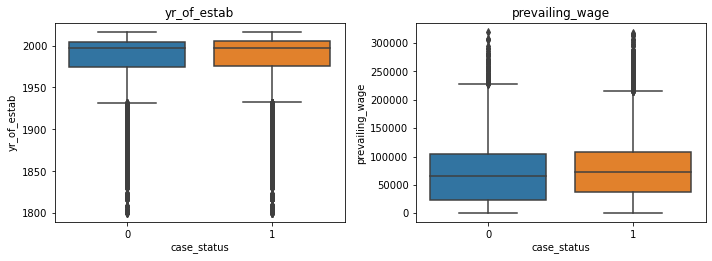

<IPython.core.display.Javascript object>

In [31]:
cols = data[["yr_of_estab", "prevailing_wage"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=df, x="case_status", y=variable)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* The rejection is not dependent on the prevailing wage at this graph. We might investigate more after outlier treatment.
* The certified status is independent of company year establishment

### case_status vs categorcial variables

In [32]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
------------------------------------------------------------------------------------------------------------------------


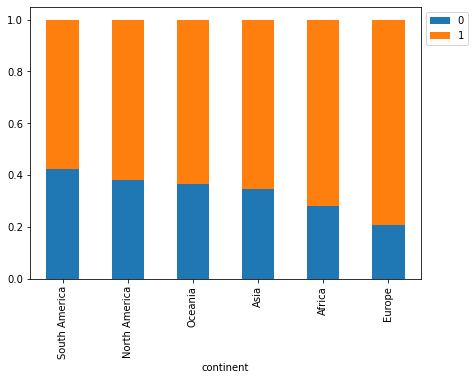

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(df, "continent", "case_status")

* Europe is the continent that has the highest percent of the certified cases among the other continents.
* South America is the continent that has the lowest percent of certified cases among most of the cases with the other continents.

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
Bachelor's             3867   6367  10234
High School            2256   1164   3420
Master's               2059   7575   9634
Doctorate               280   1912   2192
------------------------------------------------------------------------------------------------------------------------


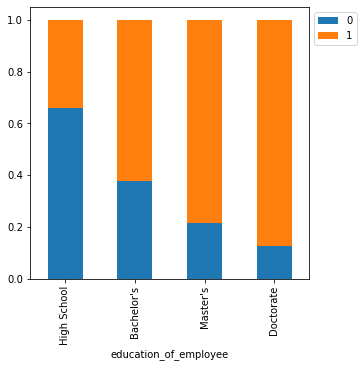

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(df, "education_of_employee", "case_status")

* The percent of rejection is the most among the cases which have education up to the high school level.
* The most the level of the education, the less the probability of rejection.

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
0                   4684   5994  10678
1                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


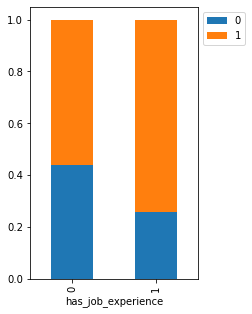

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(df, "has_job_experience", "case_status")

* Job experince will decrease the probability of rejection.

case_status               0      1    All
requires_job_training                    
All                    8462  17018  25480
0                      7513  15012  22525
1                       949   2006   2955
------------------------------------------------------------------------------------------------------------------------


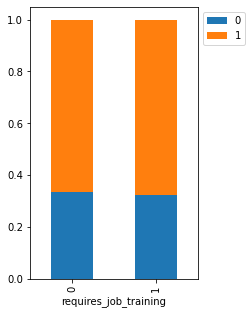

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(df, "requires_job_training", "case_status")

* Job training requirement does not have an effect on case status.

case_status              0      1    All
region_of_employment                    
All                   8462  17018  25480
Northeast             2669   4526   7195
West                  2486   4100   6586
South                 2104   4913   7017
Midwest               1054   3253   4307
Island                 149    226    375
------------------------------------------------------------------------------------------------------------------------


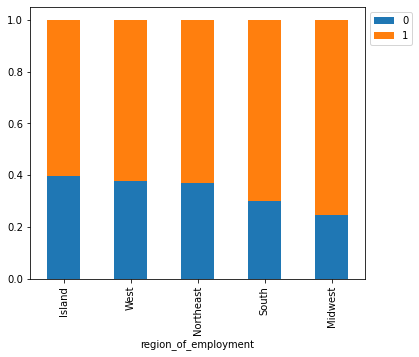

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(df, "region_of_employment", "case_status")

* The application has the highest percent of acceptance for the Midwest region.
* The application has the lowest percent of acceptance for the Island region.

case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
------------------------------------------------------------------------------------------------------------------------


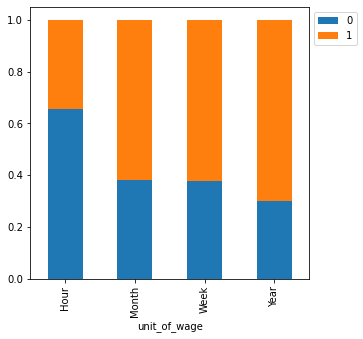

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(df, "unit_of_wage", "case_status")

* The application has the highest percent of rejection for the work which the unit of payment is hourly.
* Yearly wage unit is most likely to be certified for a visa

case_status            0      1    All
full_time_position                    
All                 8462  17018  25480
1                   7610  15163  22773
0                    852   1855   2707
------------------------------------------------------------------------------------------------------------------------


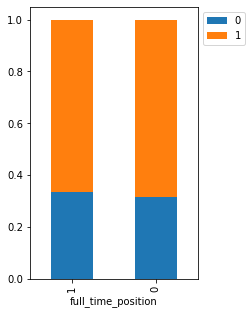

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(df, "full_time_position", "case_status")

* Full time position does not have an effect on case status.

In [40]:
df.groupby(["case_status", "unit_of_wage"])["prevailing_wage"].mean()

case_status  unit_of_wage
0            Hour              409.085998
             Month           88167.630882
             Week            85003.102233
             Year            82345.844294
1            Hour              424.922811
             Month           87237.553636
             Week            85974.767160
             Year            80746.407044
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

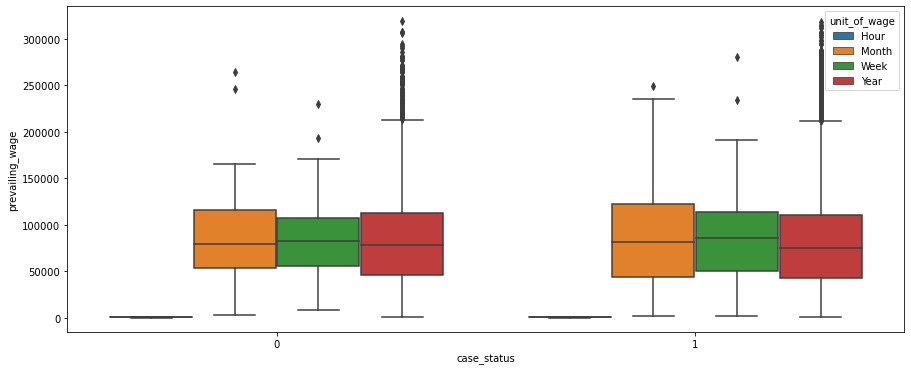

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="case_status", y="prevailing_wage", hue="unit_of_wage")
plt.show()

* The prevailling_wage in certified and not_certified cases are more or less the same for different unit types.

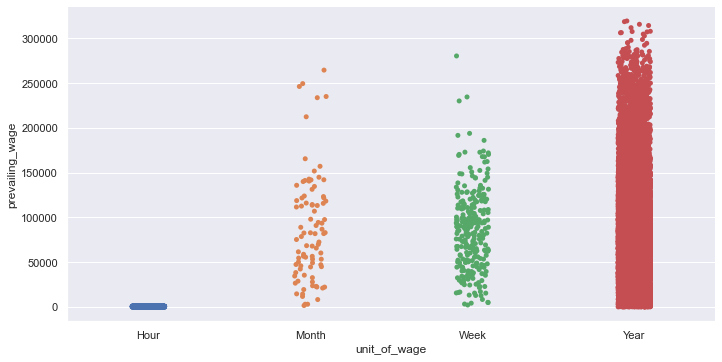

<IPython.core.display.Javascript object>

In [42]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.catplot(
    x="unit_of_wage", y="prevailing_wage", kind="strip", data=df, height=5, aspect=2
)

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Missing value treatment

In [43]:
df1 = df.copy()  # Make a copy of the data

<IPython.core.display.Javascript object>

In [44]:
df1.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* There is no missing value on the data.

### Outlier detection and treatment

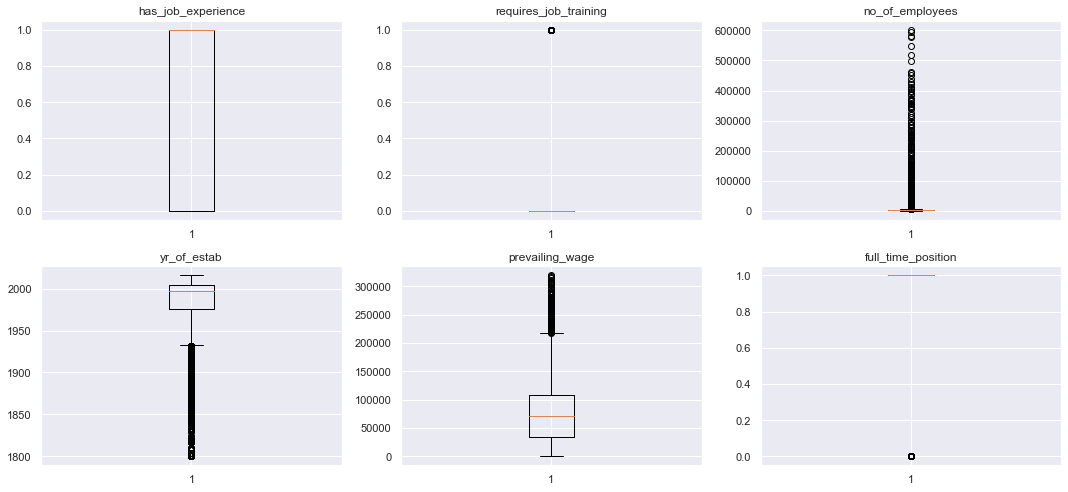

<IPython.core.display.Javascript object>

In [45]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("case_status")

plt.figure(figsize=(15, 7))

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


plt.show()

* There are quite a few outliers in the data.
* However, we will treat the data no_of_employees and prevailing_wage as discussed above.

In [46]:
df1.groupby(["case_status", "unit_of_wage"])["prevailing_wage"].describe()

count          mean           std        min  \
case_status unit_of_wage                                                   
0           Hour           1410.0    409.085998    272.458156     2.9561   
            Month            34.0  88167.630882  59848.286772  3078.3700   
            Week            103.0  85003.102233  39934.708603  8352.9900   
            Year           6915.0  82345.844294  48684.484971   153.1100   
1           Hour            747.0    424.922811    279.668255     2.1367   
            Month            55.0  87237.553636  59874.407589  1599.2800   
            Week            169.0  85974.767160  47637.360355  2183.2300   
            Year          16047.0  80746.407044  50481.509835   100.0000   

                                 25%          50%           75%          max  
case_status unit_of_wage                                                      
0           Hour            147.6450    367.79305     626.42605     999.9195  
            Month         53884.3775  78924.03500  115891.84000  264362.9500  
            Week          55031.0200  82042.03000  107314.25000  229950.7000  
            Year          45450.4300  77697.21000  112564.34000  319210.2700  
1           Hour            165.0661    376.67030     646.76250     999.1929  
            Month         43497.1700  81826.01000  122422.04000  249291.1200  
            Week          49825.2900  85297.78000  113749.63000  280175.9500  
            Year          42988.7350  75427.84000  110654.05500  318446.0500

<IPython.core.display.Javascript object>

In [47]:
df1.groupby(["case_status", "unit_of_wage"])["no_of_employees"].describe()

count         mean           std   min      25%  \
case_status unit_of_wage                                                      
0           Hour           1410.0  3994.618440  13541.527147 -26.0   854.25   
            Month            34.0  3239.411765   6029.839925  55.0  1000.50   
            Week            103.0  2661.990291   3860.438400  64.0   833.50   
            Year           6915.0  5720.273174  23972.496854 -26.0  1024.50   
1           Hour            747.0  4650.543507  17043.517577  16.0   882.50   
            Month            55.0  2462.981818   3313.760036  46.0   703.00   
            Week            169.0  8972.053254  32951.064514  74.0  1112.00   
            Year          16047.0  5838.981617  23275.378707 -26.0  1045.00   

                             50%      75%       max  
case_status unit_of_wage                             
0           Hour          1831.0  3001.75  262246.0  
            Month         2399.0  3271.25   36511.0  
            Week          1784.0  3055.50   27195.0  
            Year          2096.0  3454.00  594472.0  
1           Hour          1839.0  2910.50  288512.0  
            Month         2086.0  2981.00   20890.0  
            Week          2088.0  3571.00  278152.0  
            Year          2171.0  3617.50  602069.0

<IPython.core.display.Javascript object>

* Both of the features above, no_of_employees and prevailing_wage, have some outliers which should be treated. 

**Considering the lowest wages in the US $18k, following calculation is applied on the data to treat the lower anlomaly in prevailing wages**


In [48]:
df1.loc[df1["unit_of_wage"] == "Hour", "prevailing_wage_Hour"] = df1["prevailing_wage"]
df1.loc[df1["unit_of_wage"] == "Month", "prevailing_wage_Month"] = df1[
    "prevailing_wage"
]
df1.loc[df1["unit_of_wage"] == "Week", "prevailing_wage_Week"] = df1["prevailing_wage"]
df1.loc[df1["unit_of_wage"] == "Year", "prevailing_wage_Year"] = df1["prevailing_wage"]

<IPython.core.display.Javascript object>

In [49]:
df1.loc[df1["prevailing_wage_Hour"] < 10, "prevailing_wage"] = 10
df1.loc[df1["prevailing_wage_Month"] < 150, "prevailing_wage"] = 150
df1.loc[df1["prevailing_wage_Week"] < 35, "prevailing_wage"] = 35
df1.loc[df1["prevailing_wage_Year"] < 18000, "prevailing_wage"] = 18000

<IPython.core.display.Javascript object>

In [50]:
df1.groupby(["case_status", "unit_of_wage"])["prevailing_wage"].describe()

count          mean           std       min  \
case_status unit_of_wage                                                  
0           Hour           1410.0    409.115252    272.414976     10.00   
            Month            34.0  88167.630882  59848.286772   3078.37   
            Week            103.0  85003.102233  39934.708603   8352.99   
            Year           6915.0  83009.622406  47710.193681  18000.00   
1           Hour            747.0    424.952127    279.624378     10.00   
            Month            55.0  87237.553636  59874.407589   1599.28   
            Week            169.0  85974.767160  47637.360355   2183.23   
            Year          16047.0  81516.839689  49416.646916  18000.00   

                                 25%          50%           75%          max  
case_status unit_of_wage                                                      
0           Hour            147.6450    367.79305     626.42605     999.9195  
            Month         53884.3775  78924.03500  115891.84000  264362.9500  
            Week          55031.0200  82042.03000  107314.25000  229950.7000  
            Year          45450.4300  77697.21000  112564.34000  319210.2700  
1           Hour            165.0661    376.67030     646.76250     999.1929  
            Month         43497.1700  81826.01000  122422.04000  249291.1200  
            Week          49825.2900  85297.78000  113749.63000  280175.9500  
            Year          42988.7350  75427.84000  110654.05500  318446.0500

<IPython.core.display.Javascript object>

* The upper part of data seems to have outliers too. But without more information, it is risky to treat the data.

In [51]:
del df1["prevailing_wage_Hour"]
del df1["prevailing_wage_Month"]
del df1["prevailing_wage_Week"]
del df1["prevailing_wage_Year"]

<IPython.core.display.Javascript object>

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  int32   
 3   requires_job_training  25480 non-null  int32   
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  int32   
 10  case_status            25480 non-null  int32   
dtypes: category(4), float64(1), int32(4), int64(2)
memory usage: 1.1 MB


<IPython.core.display.Javascript object>

**All the rows with less or equall than zero employees are eliminated from the database**

In [53]:
df1.loc[df1["no_of_employees"] <= 0, "no_of_employees"] = np.nan

<IPython.core.display.Javascript object>

In [54]:
df1.isnull().sum()

continent                 0
education_of_employee     0
has_job_experience        0
requires_job_training     0
no_of_employees          33
yr_of_estab               0
region_of_employment      0
prevailing_wage           0
unit_of_wage              0
full_time_position        0
case_status               0
dtype: int64

<IPython.core.display.Javascript object>

In [55]:
df1.dropna(subset=["no_of_employees"], inplace=True)

<IPython.core.display.Javascript object>

* Totally 33 rows are eliminated which the number of data are changed 25447 rows.

In [56]:
df1.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25447 non-null  category
 1   education_of_employee  25447 non-null  category
 2   has_job_experience     25447 non-null  int32   
 3   requires_job_training  25447 non-null  int32   
 4   no_of_employees        25447 non-null  float64 
 5   yr_of_estab            25447 non-null  int64   
 6   region_of_employment   25447 non-null  category
 7   prevailing_wage        25447 non-null  float64 
 8   unit_of_wage           25447 non-null  category
 9   full_time_position     25447 non-null  int32   
 10  case_status            25447 non-null  int32   
dtypes: category(4), float64(2), int32(4), int64(1)
memory usage: 1.3 MB


<IPython.core.display.Javascript object>

### Feature engineering

* Changing case_status from certified/denied to 0 and 1 is done.
* Changing some features like has_job_experince from Y/N to 0 and 1 are done.
* Dummy variable will be generated during data preparation for modeling.

* In this Step, more data engineering will not be done on the data.

### Prepare data for modeling

In [58]:
X = df1.drop(["case_status"], axis=1)
Y = df1["case_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

* Convert categorical varibales to the dummy ones.
* Bfore this step some categorical variable is changed to 0 and 1, for heatmap generation.

In [59]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17812, 21)
Shape of test set :  (7635, 21)
Percentage of classes in training set:
1    0.666798
0    0.333202
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.67112
0    0.32888
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting case_status will certifed and the case_status denied.
2. Predicting case_status will denied and the case_status certified.

### Which case is more important? 
* Both the cases are important as:

* If we predict case_status denied, but actually it is a certified case, an apportunity to have a good worker will be lost.
* If we predict case_status certified but actually it is denied, lots of wasting time hapened for OFLC.

### How to reduce this loss i.e need to reduce False Negatives?
* OFLC would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [61]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Logistic Regression

In [62]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.535102
         Iterations 6


<IPython.core.display.Javascript object>

In [63]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:            case_status   No. Observations:                17812
Model:                          Logit   Df Residuals:                    17791
Method:                           MLE   Df Model:                           20
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                  0.1592
Time:                        14:54:27   Log-Likelihood:                -9531.2
converged:                       True   LL-Null:                       -11336.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
has_job_experience                    0.9123      0.037     24.921      0.000       0.841       0.984
requires_job_training                 0.1040      0.057      1

<IPython.core.display.Javascript object>

In [64]:
# predicting on training set
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

<IPython.core.display.Javascript object>

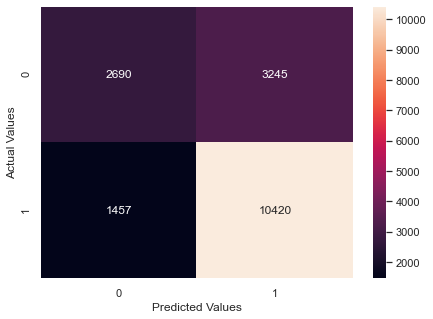

<IPython.core.display.Javascript object>

In [65]:
cm_train = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_train, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [66]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train))
print("Recall on training set : ", recall_score(y_train, pred_train))
print("Precision on training set : ", precision_score(y_train, pred_train))
print("f1-score on training set : ", f1_score(y_train, pred_train))

Accuracy on training set :  0.7360206602290591
Recall on training set :  0.8773259240548961
Precision on training set :  0.7625320160995244
f1-score on training set :  0.815911048469188


<IPython.core.display.Javascript object>

In [67]:
lg_model_train_perf = {'Accuracy' : [0.736020], "Recall": [0.87732], "Precision": [0.762532], "F1": [0.8159110] }
lg_model_train_perf = pd.DataFrame(lg_model_train_perf)
lg_model_train_perf


,Accuracy,Recall,Precision,F1
0,0.73602,0.87732,0.762532,0.815911


<IPython.core.display.Javascript object>

In [68]:
# predicting on training set
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_test = lg.predict(X_test) > 0.5
pred_test = np.round(pred_test)

<IPython.core.display.Javascript object>

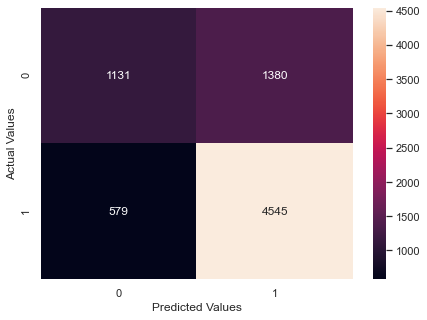

<IPython.core.display.Javascript object>

In [69]:
cm_test = confusion_matrix(y_test, pred_test)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_test, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [70]:
print("Accuracy on testing set : ", accuracy_score(y_test, pred_test))
print("Recall on testing set : ", recall_score(y_test, pred_test))
print("Precision on testing set : ", precision_score(y_test, pred_test))
print("f1-score on testing set : ", f1_score(y_test, pred_test))


Accuracy on testing set :  0.7434184675834971
Recall on testing set :  0.8870023419203747
Precision on testing set :  0.7670886075949367
f1-score on testing set :  0.8226988867770839


<IPython.core.display.Javascript object>

In [71]:
lg_model_test_perf = {'Accuracy' : [0.74341], "Recall": [0.88700], "Precision": [0.76708], "F1": [0.822698] }
lg_model_test_perf = pd.DataFrame(lg_model_test_perf)
lg_model_test_perf


,Accuracy,Recall,Precision,F1
0,0.74341,0.887,0.76708,0.822698


<IPython.core.display.Javascript object>

## Decision Tree Model

In [72]:
dtree = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
)

<IPython.core.display.Javascript object>

In [73]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

<IPython.core.display.Javascript object>

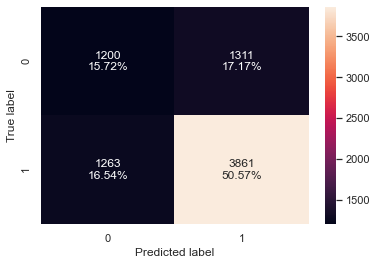

<IPython.core.display.Javascript object>

In [74]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [75]:
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
dtree_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [76]:
dtree_model_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)
dtree_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.662868,0.753513,0.74652,0.75


<IPython.core.display.Javascript object>

* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the F1-score

**Cheking the feature imortance**

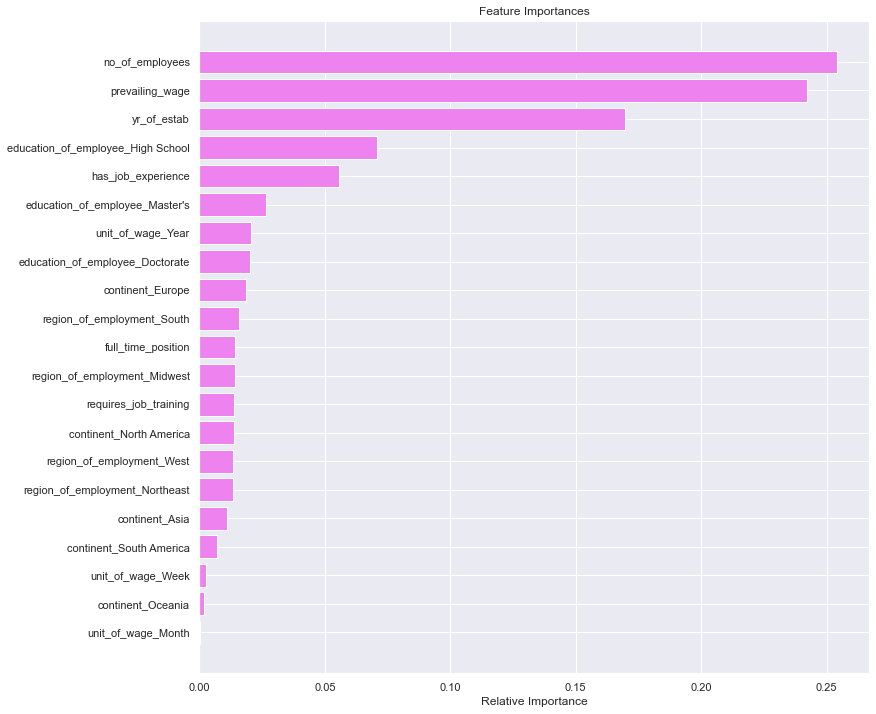

<IPython.core.display.Javascript object>

In [77]:
importances = dtree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Tuning Decision Tree

In [78]:
dtree.tree_.max_depth, dtree.tree_.n_node_samples.min(), dtree.tree_.n_leaves, dtree.tree_.node_count, dtree.get_params()

(42,
 1,
 4766,
 9531,
 {'ccp_alpha': 0.0,
  'class_weight': {0: 0.67, 1: 0.33},
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': 1,
  'splitter': 'best'})

<IPython.core.display.Javascript object>

In [79]:
# Choose the type of classifier.
start_time = time.time()

dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.67, 1: 0.33}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": [10, 20, 30, 40, 50],
    #'min_samples_leaf': [1, 2, 5, 7, 10],
    #'max_leaf_nodes' : [2, 3, 5, 10,15],  # One has to be sure about this parameter as it can aggressively prune the tree
    "min_impurity_decrease": [0, 0.0001, 0.001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

execution_time_decision_tree_tuning = time.time() - start_time

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)



DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=10,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

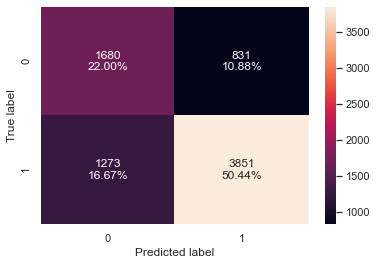

<IPython.core.display.Javascript object>

In [80]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [81]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.710364,0.733687,0.813632,0.771594


<IPython.core.display.Javascript object>

In [82]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf


,Accuracy,Recall,Precision,F1
0,0.724427,0.751561,0.822512,0.785437


<IPython.core.display.Javascript object>

* A little improvement on F1-score after applying tuning on parameters in decision tree model.
* Due to hypweparameter tuning, the overfitting issue is solved. 


**Checking for feature importance**

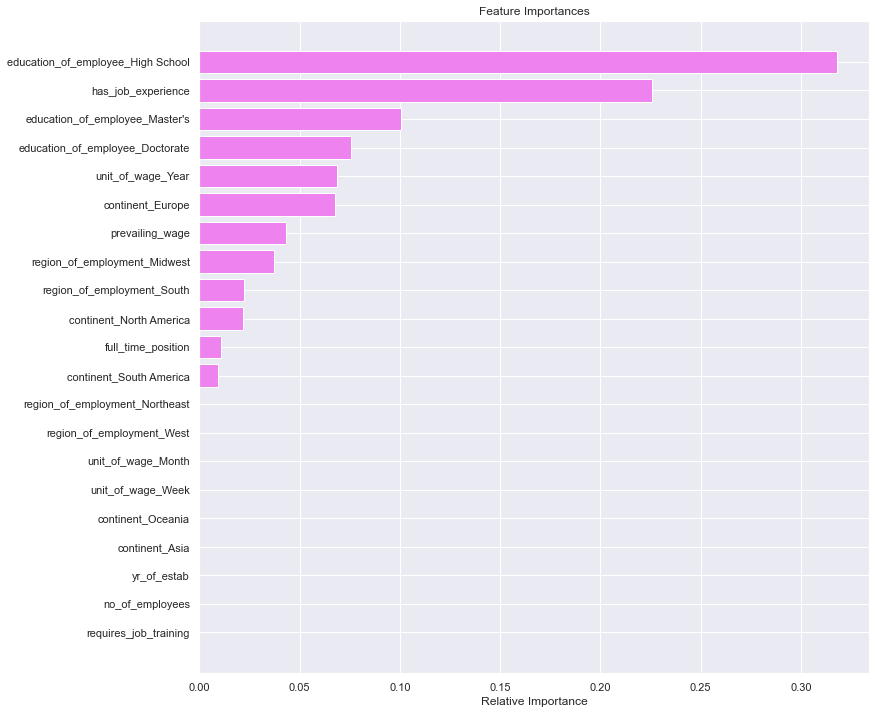

<IPython.core.display.Javascript object>

In [83]:
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Building bagging and boosting models

### Bagging Classifier

In [84]:
bagging = BaggingClassifier(
    random_state=1, bootstrap_features=False, n_estimators=30
)  # Added for illustration
bagging.fit(X_train, y_train)

BaggingClassifier(n_estimators=30, random_state=1)

<IPython.core.display.Javascript object>

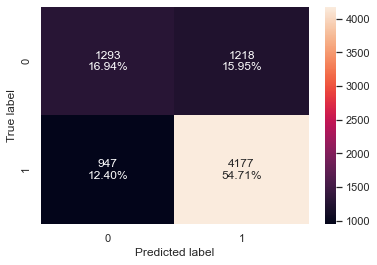

<IPython.core.display.Javascript object>

In [85]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [86]:
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, X_train, y_train
)
bagging_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.998596,0.999074,0.998822,0.998948


<IPython.core.display.Javascript object>

In [87]:
bagging_model_test_perf = model_performance_classification_sklearn(
    bagging, X_test, y_test
)
bagging_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.716437,0.815183,0.774235,0.794182


<IPython.core.display.Javascript object>

* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of F1-score.

### Bagging Classifier with weighted decision tree

In [88]:
bagging_wt = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(
        criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
    ),
    bootstrap_features=False,
    random_state=1,
    n_estimators=30,
)  # Added for illustration
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  n_estimators=30, random_state=1)

<IPython.core.display.Javascript object>

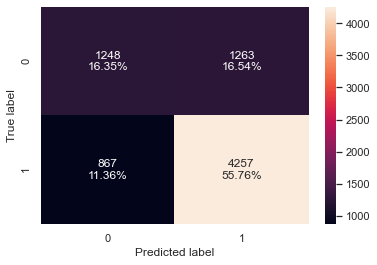

<IPython.core.display.Javascript object>

In [89]:
confusion_matrix_sklearn(bagging_wt, X_test, y_test)

In [90]:
bagging_wt_model_train_perf = model_performance_classification_sklearn(
    bagging_wt, X_train, y_train
)
bagging_wt_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.998484,0.999242,0.998486,0.998864


<IPython.core.display.Javascript object>

In [91]:
bagging_wt_model_test_perf = model_performance_classification_sklearn(
    bagging_wt, X_test, y_test
)
bagging_wt_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.721022,0.830796,0.771196,0.799887


<IPython.core.display.Javascript object>

* Bagging classifier with a weighted decision tree is overfitting on training set but is not able to generalize well on test data in terms of F1-score.

### Tuning Bagging Classifier

In [92]:
# grid search for bagging classifier
start_time = time.time()

cl1 = DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)
param_grid = {
    "base_estimator": [cl1],
    "n_estimators": [180, 240, 300],
    "max_features": [0.5, 0.6, 0.7],
}

grid = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=param_grid,
    scoring="f1",
    cv=5,
)


grid.fit(X_train, y_train)

execution_time_Bagging_tuning = time.time() - start_time

## getting the best estimator

bagging_estimator = grid.best_estimator_
bagging_estimator.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  max_features=0.7, n_estimators=300, random_state=1)

<IPython.core.display.Javascript object>

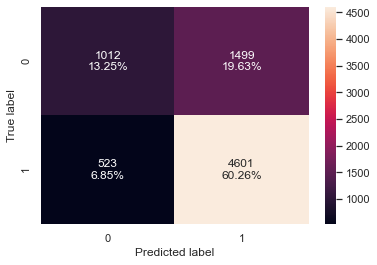

<IPython.core.display.Javascript object>

In [93]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

In [94]:
bagging_estimator_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator, X_train, y_train
)
bagging_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [95]:
bagging_estimator_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator, X_test, y_test
)
bagging_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.735167,0.897931,0.754262,0.81985


<IPython.core.display.Javascript object>

* Small imrovement in f1-score metric in tuned bagging classifier.
* Still overfitting on training set.

### Let's try using logistic regression as the base estimator for bagging classifier

In [96]:
bagging_lr = BaggingClassifier(
    base_estimator=LogisticRegression(
        solver="liblinear", random_state=1, max_iter=1000
    ),
    random_state=1,
)
bagging_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

<IPython.core.display.Javascript object>

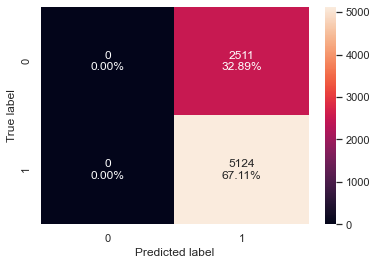

<IPython.core.display.Javascript object>

In [97]:
confusion_matrix_sklearn(bagging_lr, X_test, y_test)

In [98]:
bagging_lr_model_train_perf = model_performance_classification_sklearn(
    bagging_lr, X_train, y_train
)
bagging_lr_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.666798,1.0,0.666798,0.800094


<IPython.core.display.Javascript object>

In [99]:
bagging_lr_model_test_perf = model_performance_classification_sklearn(
    bagging_lr, X_test, y_test
)
bagging_lr_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.67112,1.0,0.67112,0.803198


<IPython.core.display.Javascript object>

## Random Forest

In [100]:
rf = RandomForestClassifier(random_state=1, n_estimators=100)  # Added for illustration
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

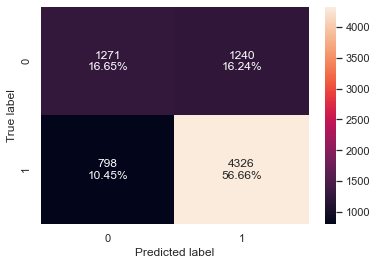

<IPython.core.display.Javascript object>

In [101]:
confusion_matrix_sklearn(rf, X_test, y_test)

In [102]:
rf_model_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
rf_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [103]:
rf_model_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)
rf_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733071,0.844262,0.777219,0.809355


<IPython.core.display.Javascript object>

* Random Forest has performed well in terms of training set, but it is not able to generalize well on the test data in terms of F1-score.

**Cheking for feature importance**

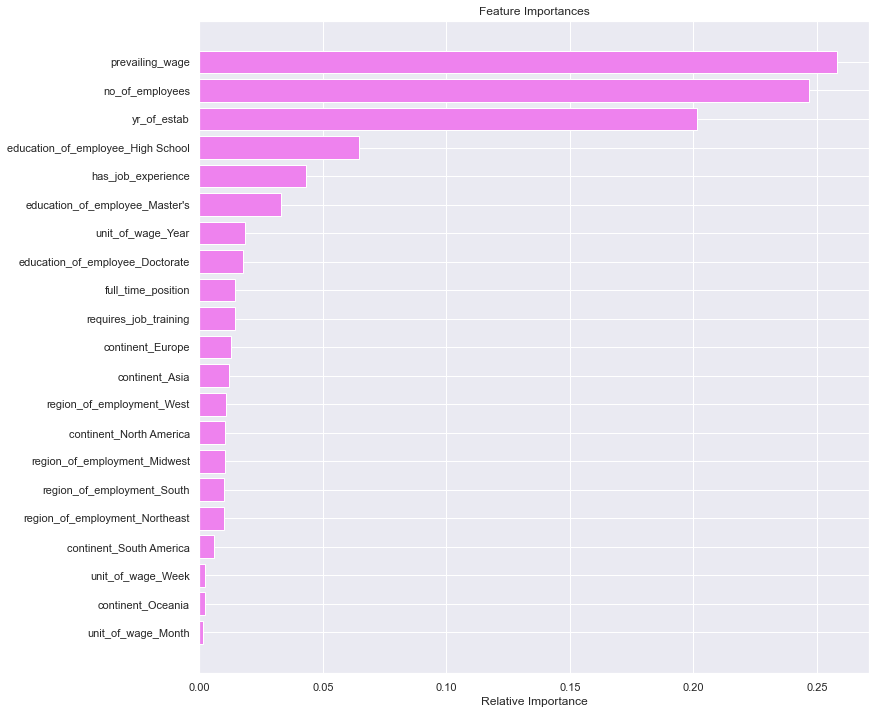

<IPython.core.display.Javascript object>

In [104]:
importances = rf.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Random forest with class weights

In [105]:
rf_wt = RandomForestClassifier(
    class_weight={0: 0.67, 1: 0.33},
    # class_weight='balanced_subsample', # ADDED for ilustration
    random_state=1,
)
rf_wt.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

<IPython.core.display.Javascript object>

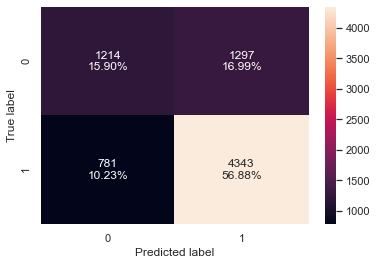

<IPython.core.display.Javascript object>

In [106]:
confusion_matrix_sklearn(rf_wt, X_test, y_test)

In [107]:
rf_wt_model_train_perf = model_performance_classification_sklearn(
    rf_wt, X_train, y_train
)
rf_wt_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [108]:
rf_wt_model_test_perf = model_performance_classification_sklearn(rf_wt, X_test, y_test)
rf_wt_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727832,0.84758,0.770035,0.806949


<IPython.core.display.Javascript object>

* There is no improvement in metrics of weighted random forest as compared to the unweighted random forest.

**Checking for feature importance**

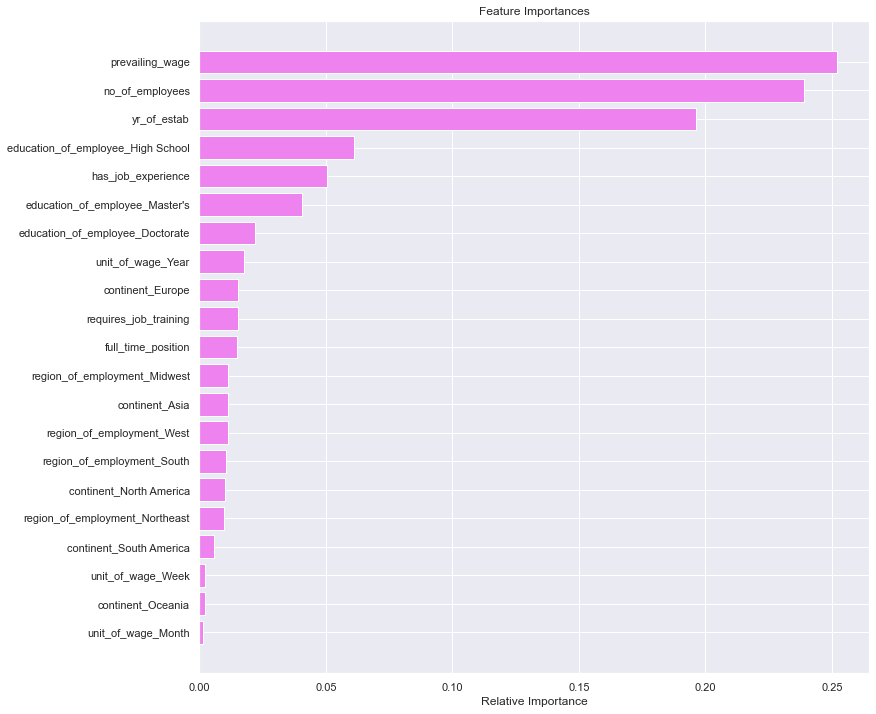

<IPython.core.display.Javascript object>

In [109]:
importances = rf_wt.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Tuning Random Forest

In [110]:
# Choose the type of classifier.

start_time = time.time()
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [{0: 0.67, 1: 0.33}],
    "n_estimators": [200, 300, 400],
    "min_samples_leaf": [40, 50, 60],
    "max_features": [0.1, 0.2, 0.3],
    # "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring="f1", cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

execution_time_random_forest_tuning = time.time() - start_time

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, max_features=0.2,
                       min_samples_leaf=60, n_estimators=300, random_state=1)

<IPython.core.display.Javascript object>

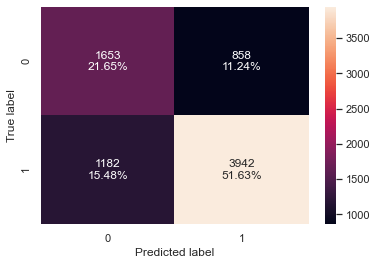

<IPython.core.display.Javascript object>

In [111]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [112]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.731192,0.761219,0.822432,0.790643


<IPython.core.display.Javascript object>

In [113]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.732809,0.769321,0.82125,0.794438


<IPython.core.display.Javascript object>

* The score is decreased respect to pretuned random forest method.
* But the training model is no overfitted. 

**Checking for feature importance**

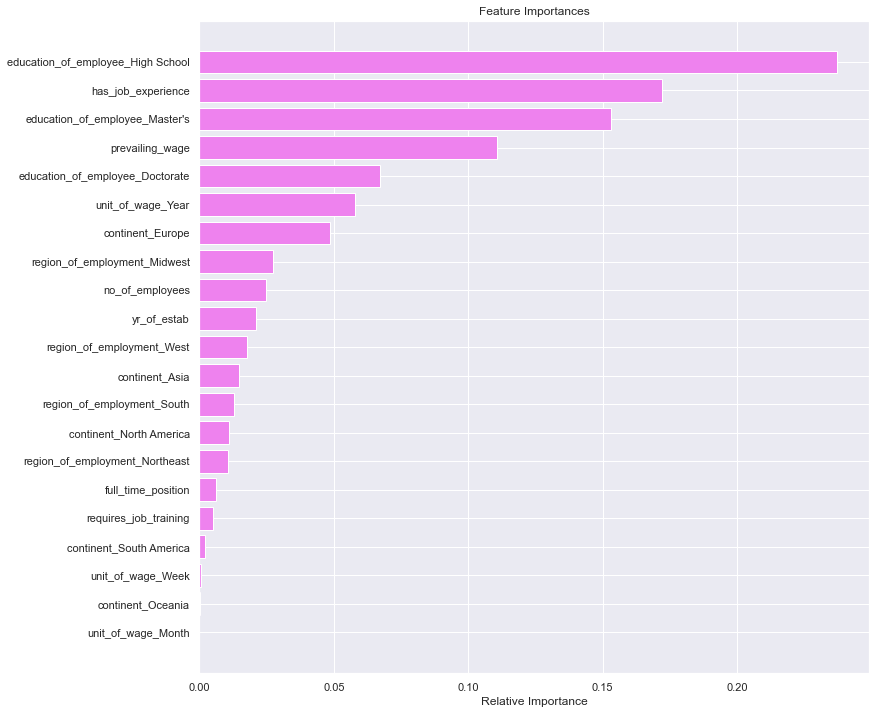

<IPython.core.display.Javascript object>

In [114]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Boosting Classifier

### AdaBoost Classifier

In [115]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

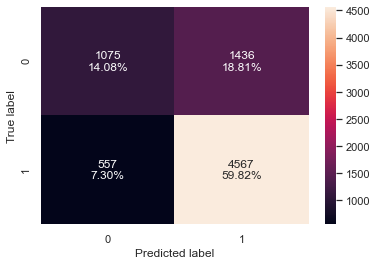

<IPython.core.display.Javascript object>

In [116]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [117]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.735852,0.885072,0.75888,0.817132


<IPython.core.display.Javascript object>

In [118]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738965,0.891296,0.760786,0.820886


<IPython.core.display.Javascript object>

* The model performance is good on the f1 score and the model is not overfitted.

**Checking for feature importance**

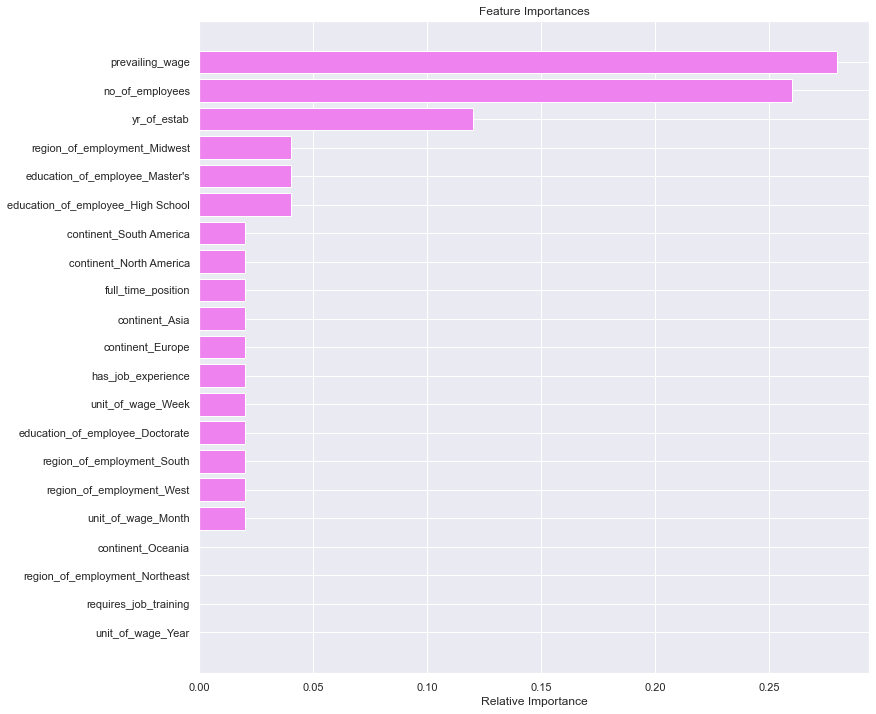

<IPython.core.display.Javascript object>

In [119]:
importances = ab_classifier.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Tuning AdaBoost

In [120]:
# Choose the type of classifier.

start_time = time.time()
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
        DecisionTreeClassifier(max_depth=4, random_state=1),
    ],
    "n_estimators": [40, 60, 70, 80],
    "learning_rate": [0.05, 0.1, 0.5],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

execution_time_AdaBoost_tuning = time.time() - start_time

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=40, random_state=1)

<IPython.core.display.Javascript object>

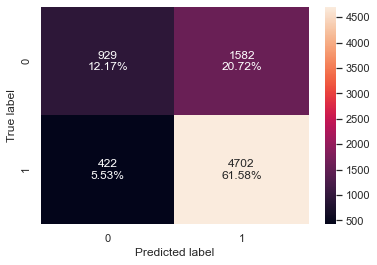

<IPython.core.display.Javascript object>

In [121]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [122]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.73967,0.917572,0.748695,0.824575


<IPython.core.display.Javascript object>

In [123]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.737525,0.917642,0.74825,0.824334


<IPython.core.display.Javascript object>

* After tuning the hyper parameter the results is slightly improved.

**Checking for feature importance**

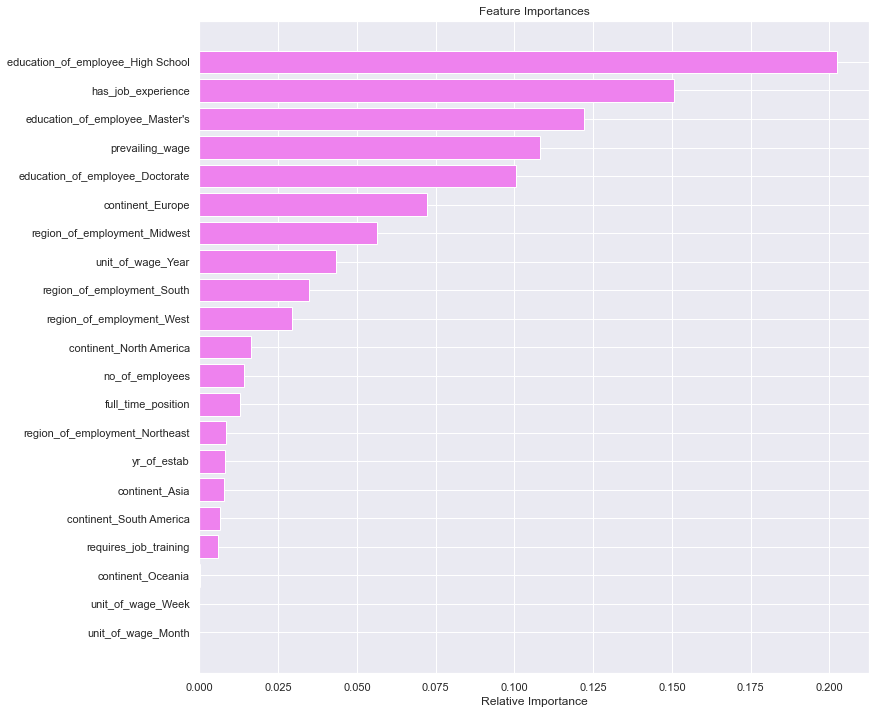

<IPython.core.display.Javascript object>

In [124]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Gradient Boosting Classifier

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [125]:
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

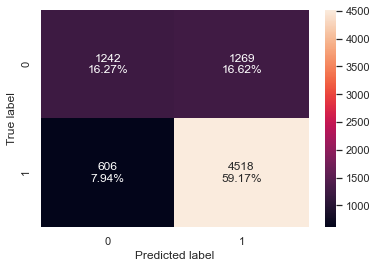

<IPython.core.display.Javascript object>

In [126]:
confusion_matrix_sklearn(gbc_init, X_test, y_test)

In [127]:
gbc_model_train_perf = model_performance_classification_sklearn(
    gbc_init, X_train, y_train
)
gbc_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754042,0.876316,0.781381,0.82613


<IPython.core.display.Javascript object>

In [128]:
gbc_model_test_perf = model_performance_classification_sklearn(gbc_init, X_test, y_test)
gbc_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.75442,0.881733,0.780715,0.828155


<IPython.core.display.Javascript object>

* The data is not overfitted.
* The prediction is as good as AdaBoosting tunned model.

**Checking for feature importance**

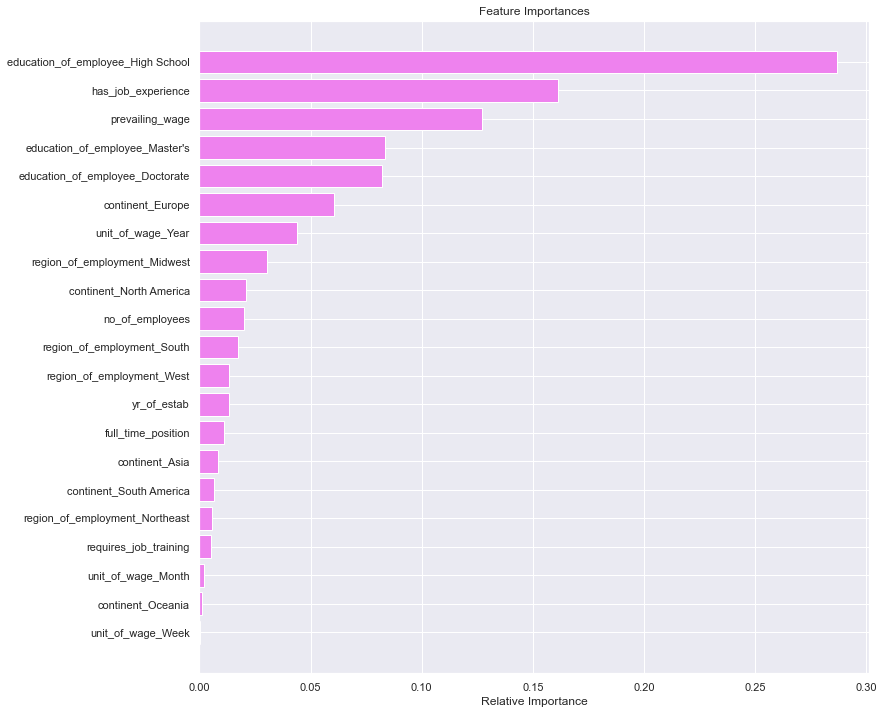

<IPython.core.display.Javascript object>

In [129]:
importances = gbc_init.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Tuning Gradient Boosting Classifier

In [130]:
# Choose the type of classifier.

start_time = time.time()
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.2, 0.4, 0.6],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

execution_time_gbc_tuning = time.time() - start_time

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.4, random_state=1, subsample=1)

<IPython.core.display.Javascript object>

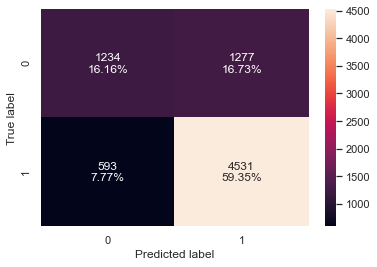

<IPython.core.display.Javascript object>

In [131]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [132]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.752414,0.877831,0.778932,0.825429


<IPython.core.display.Javascript object>

In [133]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.755075,0.88427,0.780131,0.828943


<IPython.core.display.Javascript object>

* No improvement in tuned model of gradient boosting classifier

**Checking for feature importance**

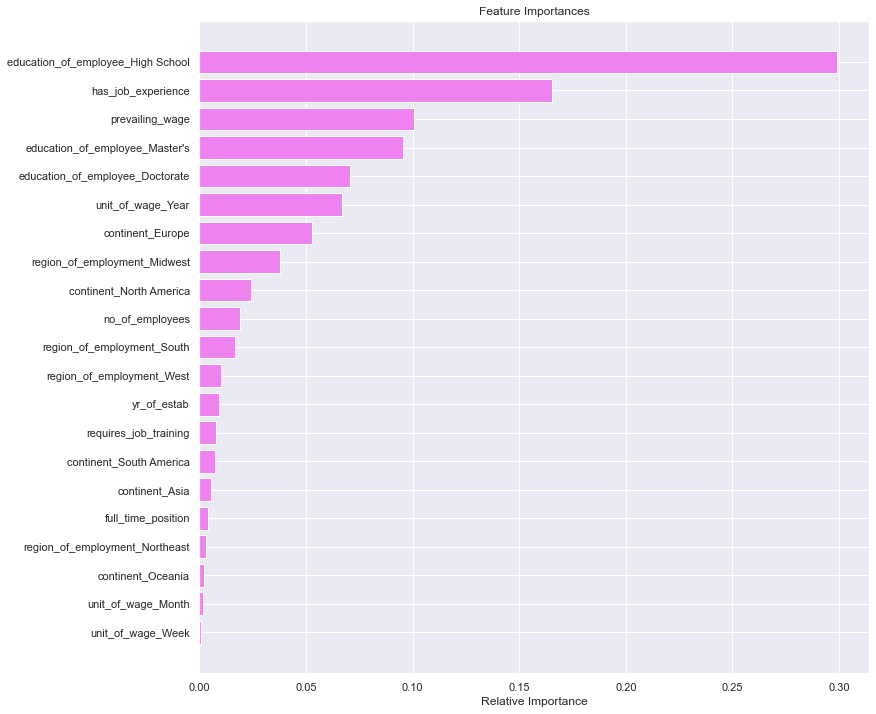

<IPython.core.display.Javascript object>

In [134]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### XGBoost Classifier

In [135]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

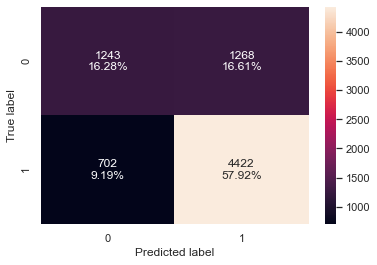

<IPython.core.display.Javascript object>

In [136]:
confusion_matrix_sklearn(xgb, X_test, y_test)

In [137]:
xgb_model_train_perf = model_performance_classification_sklearn(xgb, X_train, y_train)
xgb_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.830901,0.925234,0.838023,0.879472


<IPython.core.display.Javascript object>

In [138]:
xgb_model_test_perf = model_performance_classification_sklearn(xgb, X_test, y_test)
xgb_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.741978,0.862998,0.777153,0.817829


<IPython.core.display.Javascript object>

* The model is ovefitted on training data.


**Checking for feature importance**

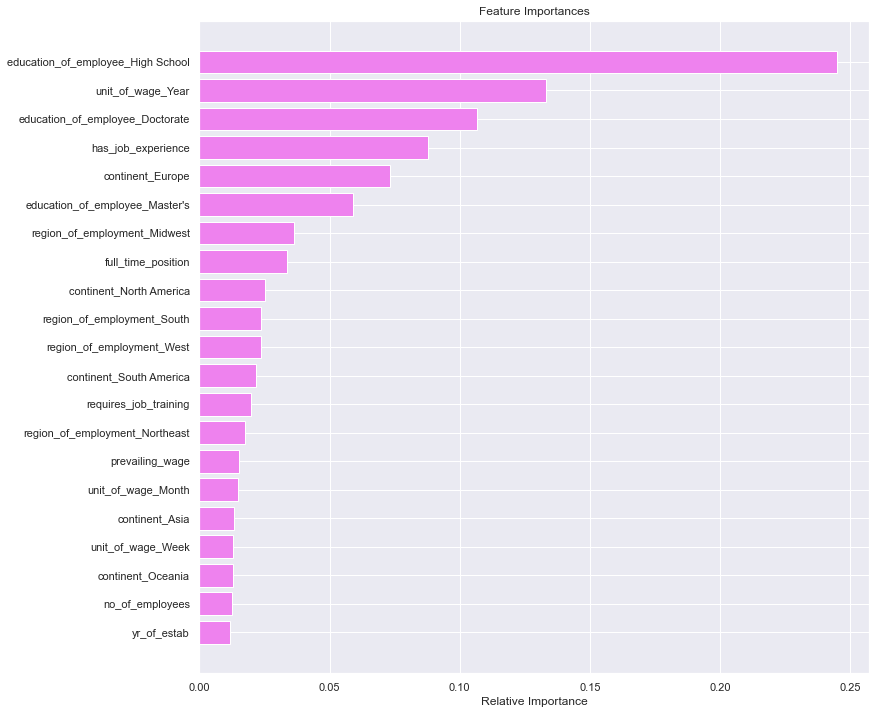

<IPython.core.display.Javascript object>

In [139]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Tuning XGBoost Classifier

In [140]:
# Choose the type of classifier.

start_time = time.time()
xgb_tuned = XGBClassifier(
    random_state=1, eval_metric="logloss", use_label_encoder=False, n_jobs=-1
)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [0, 1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.15, 0.3],
    "gamma": [0, 3],
    "colsample_bytree": [0.5, 0.8, 1],
    "colsample_bylevel": [0.5, 0.8, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

execution_time_xgb_tuning = time.time() - start_time

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='logloss', gamma=3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

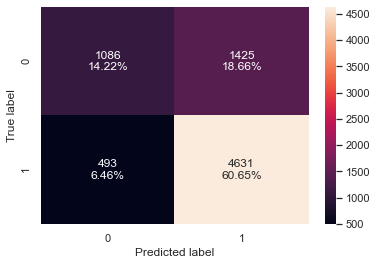

<IPython.core.display.Javascript object>

In [141]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [142]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.748709,0.903511,0.763175,0.827435


<IPython.core.display.Javascript object>

In [143]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.748788,0.903786,0.764696,0.828444


<IPython.core.display.Javascript object>

**Checking for feature importance**

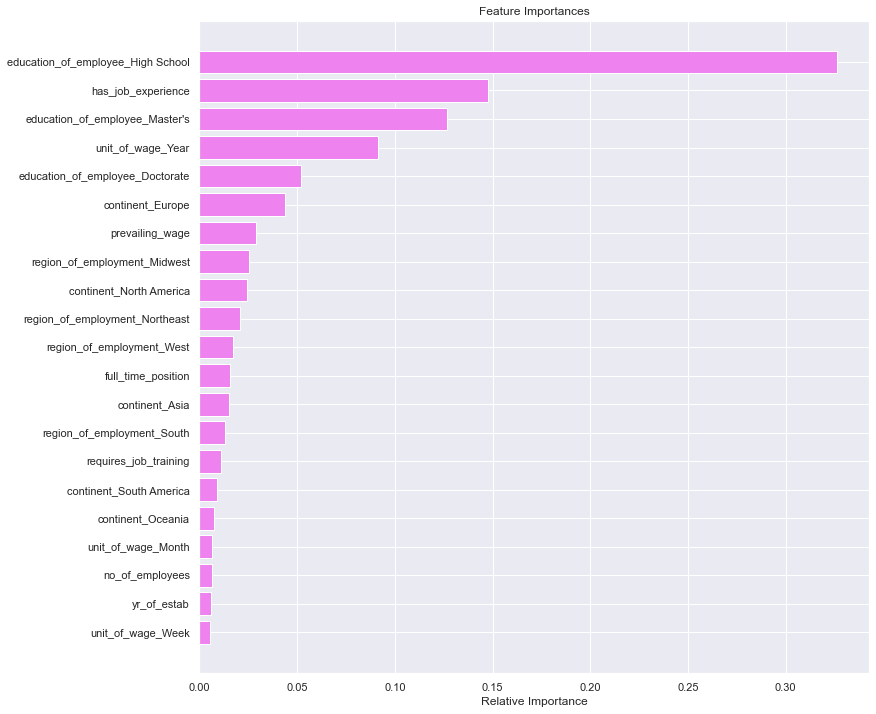

<IPython.core.display.Javascript object>

In [144]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Stacking model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [145]:

estimators = [
    ("Decision Tree", dtree_estimator),
    ("Random Forest", rf_estimator),
    ("Bagging", bagging_estimator),
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
]
final_estimator = XGBClassifier(random_state=1)


<IPython.core.display.Javascript object>

In [146]:
stacking_estimator = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_estimator.fit(X_train, y_train)

C:\Anacoda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_depth=10,
                                                       min_impurity_decrease=0.001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_features=0.2,
                                                       min_samples_leaf=60,
                                                       n_estimators=300,
                                                       random_state=1)),
                               ('Bagging',

<IPython.core.display.Javascript object>

In [147]:
stacking_estimator_model_train_perf = model_performance_classification_sklearn(
    stacking_estimator, X_train, y_train
)
stacking_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.822423,0.906795,0.839701,0.871959


<IPython.core.display.Javascript object>

In [148]:
stacking_estimator_model_test_perf = model_performance_classification_sklearn(
    stacking_estimator, X_test, y_test
)
stacking_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743549,0.87178,0.774445,0.820235


<IPython.core.display.Javascript object>

## Model Performance Comparison and Conclusions

In [149]:
models_train_comp_df = pd.concat(
    [
        lg_model_train_perf.T,
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_wt_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        bagging_lr_model_train_perf.T,
        rf_model_train_perf.T,
        rf_wt_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_estimator_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging",
    "Bagging Weighted",
    "Bagging Tuned",
    "Bagging Logistic Regression",
    "Random Forest",
    "Random Forest Weighted",
    "Random Forest Tuned",
    "AdaBoost",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XGBoost",
    "XGBoost Tuned",
    "Stacking Classifier",
]

models_train_comp_df

,Logistic Regression,Decision Tree,Decision Tree Tuned,Bagging,Bagging Weighted,Bagging Tuned,Bagging Logistic Regression,Random Forest,Random Forest Weighted,Random Forest Tuned,AdaBoost,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,XGBoost,XGBoost Tuned,Stacking Classifier
Accuracy,0.736020,1.0,0.710364,0.998596,0.998484,1.0,0.666798,1.0,1.0,0.731192,0.735852,0.739670,0.754042,0.752414,0.830901,0.748709,0.822423
Recall,0.877320,1.0,0.733687,0.999074,0.999242,1.0,1.000000,1.0,1.0,0.761219,0.885072,0.917572,0.876316,0.877831,0.925234,0.903511,0.906795
Precision,0.762532,1.0,0.813632,0.998822,0.998486,1.0,0.666798,1.0,1.0,0.822432,0.758880,0.748695,0.781381,0.778932,0.838023,0.763175,0.839701
F1,0.815911,1.0,0.771594,0.998948,0.998864,1.0,0.800094,1.0,1.0,0.790643,0.817132,0.824575,0.826130,0.825429,0.879472,0.827435,0.871959


<IPython.core.display.Javascript object>

In [150]:
models_test_comp_df = pd.concat([lg_model_test_perf.T, dtree_model_test_perf.T, dtree_estimator_model_test_perf.T, bagging_model_test_perf.T, bagging_wt_model_test_perf.T, bagging_estimator_model_test_perf.T, bagging_lr_model_test_perf.T, rf_model_test_perf.T, rf_wt_model_test_perf.T, rf_estimator_model_test_perf.T, ab_classifier_model_test_perf.T, abc_tuned_model_test_perf.T, gbc_model_test_perf.T, gbc_tuned_model_test_perf.T, xgb_model_test_perf.T, xgb_tuned_model_test_perf.T, stacking_estimator_model_test_perf.T],axis=1,)

models_test_comp_df.columns = ['Logistic Regression', 'Decision Tree', 'Decision Tree Tuned', 'Bagging', 'Bagging Weighted', 'Bagging Tuned', 'Bagging Logistic Regression' ,'Random Forest', 'Random Forest Weighted', 'Random Forest Tuned', 'AdaBoost', 'Adaboost Tuned', 'Gradient Boost', 'Gradient Boost Tuned', 'XGBoost', 'XGBoost Tuned' ,'Stacking Classifier']

models_test_comp_df


,Logistic Regression,Decision Tree,Decision Tree Tuned,Bagging,Bagging Weighted,Bagging Tuned,Bagging Logistic Regression,Random Forest,Random Forest Weighted,Random Forest Tuned,AdaBoost,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,XGBoost,XGBoost Tuned,Stacking Classifier
Accuracy,0.743410,0.662868,0.724427,0.716437,0.721022,0.735167,0.671120,0.733071,0.727832,0.732809,0.738965,0.737525,0.754420,0.755075,0.741978,0.748788,0.743549
Recall,0.887000,0.753513,0.751561,0.815183,0.830796,0.897931,1.000000,0.844262,0.847580,0.769321,0.891296,0.917642,0.881733,0.884270,0.862998,0.903786,0.871780
Precision,0.767080,0.746520,0.822512,0.774235,0.771196,0.754262,0.671120,0.777219,0.770035,0.821250,0.760786,0.748250,0.780715,0.780131,0.777153,0.764696,0.774445
F1,0.822698,0.750000,0.785437,0.794182,0.799887,0.819850,0.803198,0.809355,0.806949,0.794438,0.820886,0.824334,0.828155,0.828943,0.817829,0.828444,0.820235


<IPython.core.display.Javascript object>

* XGBoost and Gradient Boosting are the best models (XGBoost is slighlty better).
* A simple model like logestic regression is working good without overfitting the data.

In [151]:
print(
    "The ececution time for tuned dection tree model is: ",
    execution_time_decision_tree_tuning,
)
print("The ececution time for tuned bagging model is: ", execution_time_Bagging_tuning)
print(
    "The ececution time for tuned random forest model is: ",
    execution_time_random_forest_tuning,
)
print(
    "The ececution time for tuned AdaBoost model is: ", execution_time_AdaBoost_tuning
)
print(
    "The ececution time for tuned Gradient Boost model is: ", execution_time_gbc_tuning
)
print("The ececution time for tuned XGBoost model is: ", execution_time_xgb_tuning)

The ececution time for tuned dection tree model is:  8.338333129882812
The ececution time for tuned bagging model is:  525.8099021911621
The ececution time for tuned random forest model is:  236.63196754455566
The ececution time for tuned AdaBoost model is:  396.29870319366455
The ececution time for tuned Gradient Boost model is:  404.48594212532043
The ececution time for tuned XGBoost model is:  2865.6179296970367


<IPython.core.display.Javascript object>

## Discussion for different models

**Logistic Model**
* The logistic model is working good both on training and test dataset, even it is the simplest model which is used.
---

**Decision Tree Model**
* Decision tree model is working perfect on training data, but it is not able to generalize well on the test data in terms of F1-score.
* When the data are tuned in decision tree model, the data is not overfitted but the prediction might be improved in terms of F1-score.
---

**Bagging Model**
* The same as decision tree model, in bagging model the data are overfitted again.
* No much improvement in weighted bagging model.
* In the bagging tuned model the performance in increased a little but the data are suffering from overfitting again.
* Bagging logistic regression is working perfectly in terms of recall, but percision is not good enough. 80% of perfomance in f1-score with simple model is acceptable.
---

**Random Forest**
* Random forest model is overfitted with the default parameters and the weighted random forest model is still suffering from overfitting in training data with no improvement in performance.
* In tuned random forest model overfiting problem is solved but the performance is decreased a lot.
---

**Boosting Models**
* AdaBoost model is working good even wihout tuning. The data are not overfitted and the performance is 82% in terms of f1-score.
* AdaBoost tuned model is slighltly working better than AdaBoost with increasing the perfomance of f1-score.
* Gradient Bossting in default parameters with AdaBoost classifier as initial predictor working as the same as AdaBoost and slightly better on tuning ones. 
* XGBoost model with default parameters is overfitted a little. After tuning the hyperparameters, the overfitted problem is solved and is working properly. 
---
* Stacking model improve the perfomance but not more than XGBoost or Gradient Boosting.


**Run Time**
* It is too important considering the run time of each model. As it is calculated, the run time for XGBoost model to be tuned is near the 8 times of the Gradient Boosting. 
* Considering the run time, the simplest model such as logistic regression is competetive with respect to the others.


## Actionable Insights and Recommendations

* In all the models after parameters tuning, the most important features are education and job experince.
* For the education, education up to high school has the most effect on case status.
* After education up to high school, job experince has the most effect on case status.
* Before the tuning parameters, in some models prevailing wage also has effect on case status.
* The other parameters like the continents of applicant and the area which the applicant is applying also has some minor effect on application status. 
---
* It is recommended to extract the cases which has education up to high school and postpone their analysis as the probability of rejection in these cases are high.
* It is recommended to process the cases which has job experince with high level of education like Doctorate, Master's or Bechelore's degree.
* Also it is recommended to consider the cases which are applied from Europe and are applying to the Midwest area.